In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
readcsv = pd.read_csv("C:\\Users\\user\\Desktop\\Pankaj\\heart.csv")
df = pd.DataFrame(readcsv)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


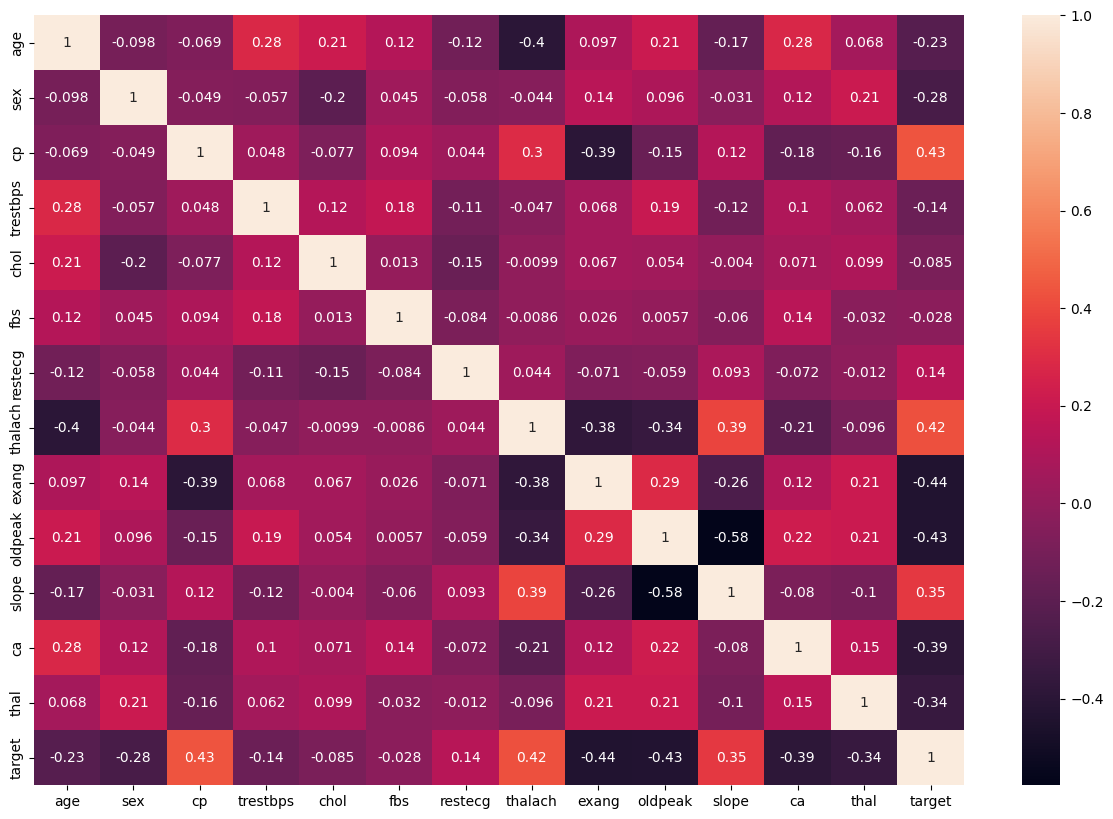

In [7]:
# Correlation Matrix
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


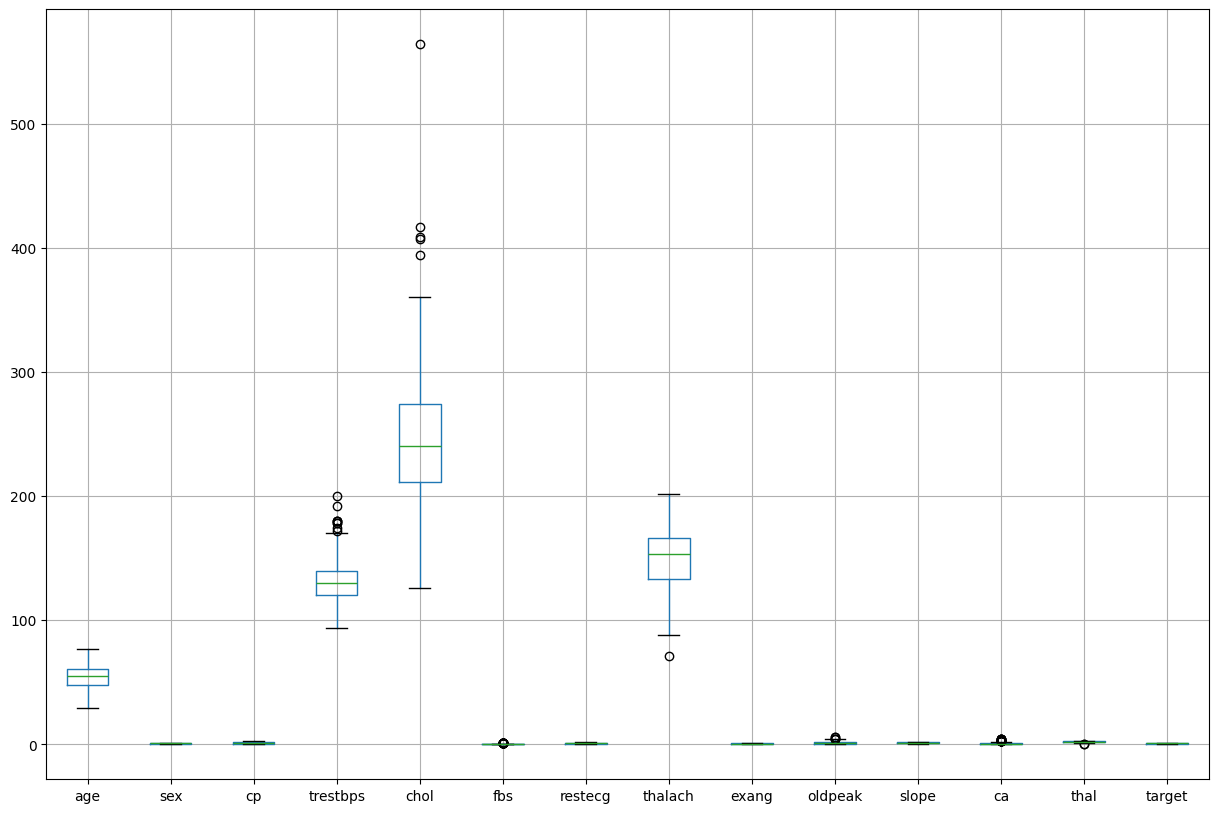

In [9]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()

In [ ]:
X = df.drop(columns=['restecg']).values # Ensure numerical data type
y = df['restecg'].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # Normalize data

In [ ]:
# Split dataset into training and testing
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    train_indices = indices[test_size:]
    test_indices=indices[:test_size]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_seed=42)

In [ ]:
def compute_cost(y, y_predicted):
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
    return cost

In [ ]:
def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    cost_history = []
    for _ in range(iterations):
        linear_model = np.dot(X, weights) + bias
        y_predicted = sigmoid(linear_model)
        
        cost = compute_cost(y, y_predicted)
        cost_history.append(cost)
        
        dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / n_samples) * np.sum(y_predicted - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias, cost_history

In [ ]:
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_predicted])

In [ ]:
# Train logistic regression model
weights, bias, cost_history = train_logistic_regression(X_train, y_train, learning_rate=0.01, iterations=1000)

In [ ]:
# Evaluate model on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
predictions = predict(X_test, weights, bias)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)


ROC AUC Score: 0.6448


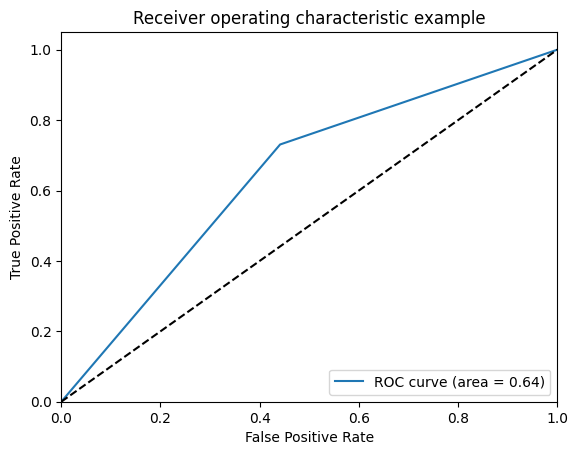

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f'ROC AUC Score: {roc_auc:.4f}')
plt.figure()

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6333
Precision: 0.5588
Recall: 0.7308
F1 Score: 0.6333
Confusion Matrix:
[[19 15]
 [ 7 19]]


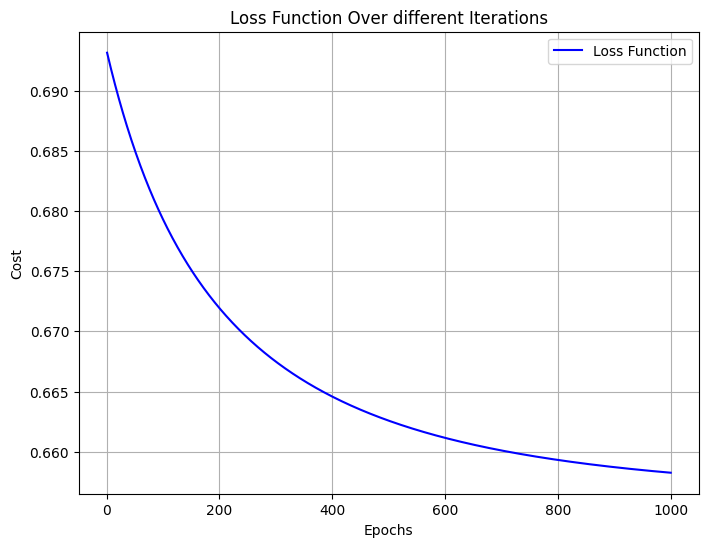

In [ ]:
# Plot loss function
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, label="Loss Function", color='b')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Loss Function Over different Iterations")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
# Feature Selection using Correlation
# df_corr = df_filtered.corr()
# corr_threshold = 0.1  # Define correlation threshold
# selected_features = df_corr["Taste"].abs().sort_values(ascending=False)
# selected_features = selected_features[selected_features > corr_threshold].index.tolist()
# selected_features.remove("Taste")

# Feature Selection using Correlation
selected_features = df.corr()['restecg'].abs().nlargest(3).index.tolist()
selected_features.remove('restecg')

In [ ]:
# df_filtered = df.drop(columns=[''])  # Drop column
X = df[selected_features].values  # Ensure numerical data type
y = df['restecg'].values

In [ ]:
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model and hyper parameter tuining
log_reg = LogisticRegression()
log_param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_grid_search = GridSearchCV(log_reg, log_param_grid, cv=5, scoring='accuracy')
log_grid_search.fit(X_train, y_train)
best_log_reg = log_grid_search.best_estimator_
log_predictions = best_log_reg.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# k-Nearest Neighbors Model
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
best_knn = knn_grid_search.best_estimator_
knn_predictions = best_knn.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Evaluation Metrics for Logistic Regression
log_accuracy = accuracy_score(y_test, log_predictions)
log_precision = precision_score(y_test, log_predictions)
log_recall = recall_score(y_test, log_predictions)
log_f1 = f1_score(y_test, log_predictions)
log_conf_matrix = confusion_matrix(y_test, log_predictions)

In [ ]:
# Evaluation Metrics for kNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

In [ ]:
# ROC Curve for Logistic Regression
log_fpr, log_tpr, _ = roc_curve(y_test, log_predictions)
log_roc_auc = roc_auc_score(y_test, log_predictions)

In [ ]:
# ROC Curve for kNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

In [ ]:
# Print Metrics
print("Logistic Regression Metrics:")
print(f'Accuracy: {log_accuracy:.4f}')
print(f'Precision: {log_precision:.4f}')
print(f'Recall: {log_recall:.4f}')
print(f'F1 Score: {log_f1:.4f}')
print(f'Confusion Matrix:\n{log_conf_matrix}')
print(f'ROC AUC Score: {log_roc_auc:.4f}')

Logistic Regression Metrics:
Accuracy: 0.6557
Precision: 0.5610
Recall: 0.8846
F1 Score: 0.6866
Confusion Matrix:
[[17 18]
 [ 3 23]]
ROC AUC Score: 0.6852


In [ ]:
print("\nKNN Metrics:")
print(f'Accuracy: {knn_accuracy:.4f}')
print(f'Precision: {knn_precision:.4f}')
print(f'Recall: {knn_recall:.4f}')
print(f'F1 Score: {knn_f1:.4f}')
print(f'Confusion Matrix:\n{knn_conf_matrix}')
print(f'ROC AUC Score: {knn_roc_auc:.4f}')



KNN Metrics:
Accuracy: 0.5246
Precision: 0.4483
Recall: 0.5000
F1 Score: 0.4727
Confusion Matrix:
[[19 16]
 [13 13]]
ROC AUC Score: 0.5214


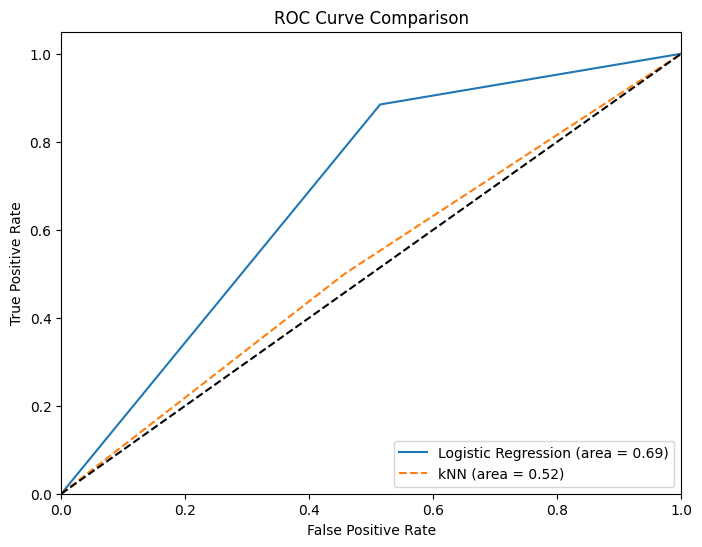

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN (area = %0.2f)' % knn_roc_auc, linestyle='dashed')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()